# Part B: Build a wine quality prediction model using K-NN
## Determine efficacy of PCA

In [36]:
# Imports....the usual suspects
import postgresql
import pandas as pd
import sklearn
import matplotlib
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

## 1. Download the Wine Quality Dataset from the UCI
http://archive.ics.uci.edu/ml/datasets/Wine+Quality
Look for the 'Data Folder' link near top

In [37]:
data = pd.read_csv("data/winequality-red.csv", sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## 2. Split the Red Wine Dataset into training and testing

In [38]:
x_df = data.drop(columns=['quality'])
y_df = data[['quality']]
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df)

## 3. Build a K-NN Regression Model to predict the continuous quality variable in the Red Wine Dataset.  Predict for your test set (you're estimating quality column)

Hint, you may want to drop the last element of your test set if it's a giant array: red_y_test[:-1]

In [39]:
clf = KNeighborsRegressor(n_neighbors=5)
clf.fit(x_train, y_train)

KNeighborsRegressor()

## 4. What is the mean of the differences between the Y actuals (quality column) and your rounded predictions?

In [40]:
y_results = pd.DataFrame(y_test)
y_results['prediction'] = clf.predict(x_test)
y_results['pred_rounded'] = y_results['prediction'].round().astype(int)
y_results['error'] = y_results['pred_rounded'] - y_results['quality']
y_results['error'].abs().mean()

0.4825

## 5. Repeat steps 2-5 after applying PCA to the data. 

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train)
x_pca = pca.transform(x_train)
x_pca_test = pca.transform(x_test)
clf = KNeighborsRegressor(n_neighbors=5)
clf.fit(x_pca, y_train)
y_results = pd.DataFrame(y_test)
y_results['prediction'] = clf.predict(x_pca_test)
y_results['pred_rounded'] = y_results['prediction'].round().astype(int)
y_results['error'] = y_results['pred_rounded'] - y_results['quality']
y_results['error'].abs().mean()

0.5425

## 6. Did PCA help accuracy?

on performing PCA the actual prediction get downgraded because we are concising the data, but the accuracy reduces insignificant.

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

## 1. Import IRIS dataset

In [42]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
# iris_target = iris.target
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 2. Plot sepal width vs sepal length

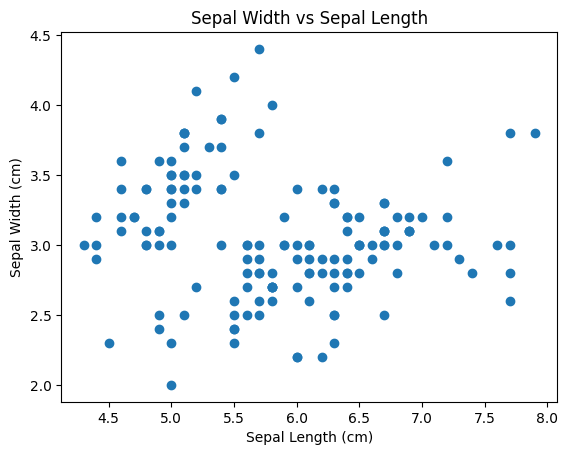

In [45]:
import matplotlib.pyplot as plt
plt.scatter(iris_data['sepal length (cm)'], iris_data['sepal width (cm)'])
plt.title('Sepal Width vs Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

## 3. Create a KMeans Clustering model and fit to IRIS data

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_data)

KMeans(n_clusters=3)

## 4. What are resulting the cluster centers ?

In [51]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

## 5. Plot the clustered data.

C:\Users\dipes\AppData\Local\Temp\ipykernel_24928\4230062550.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


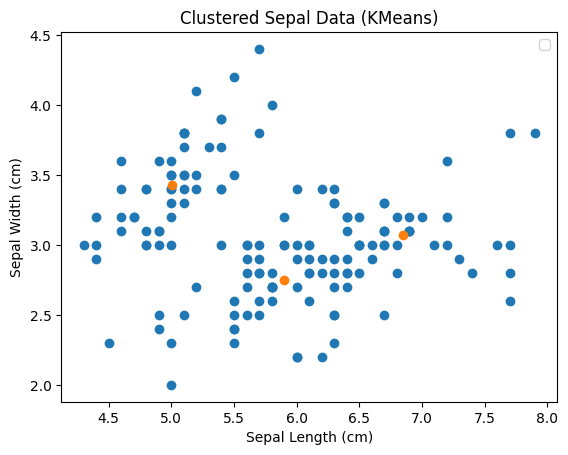

In [52]:
import matplotlib.pyplot as plt
plt.scatter(iris_data['sepal length (cm)'], iris_data['sepal width (cm)'])
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1])
plt.title('Clustered Sepal Data (KMeans)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()